# BasicTauLeapingSolver

### Imports

In [16]:
import sys
import os
import numpy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.basic_tau_leaping_solver import BasicTauLeapingSolver

### Model Instantiation

Model must include rates, species, and reactions

In [17]:
import gillespy2
class VilarOscillator(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="VilarOscillator")
            
            #parameters
            alpha_a = gillespy2.Parameter(name='alpha_a', expression= 50.0)
            alpha_a_prime = gillespy2.Parameter(name='alpha_a_prime', expression= 500.0)
            alpha_r = gillespy2.Parameter(name='alpha_r', expression = 0.01)
            alpha_r_prime = gillespy2.Parameter(name='alpha_r_prime', expression = 50.0)
            beta_a = gillespy2.Parameter(name='beta_a', expression= 50.0)
            beta_r = gillespy2.Parameter(name='beta_r', expression= 5.0)
            delta_ma = gillespy2.Parameter(name='delta_ma', expression = 10.0)
            delta_mr = gillespy2.Parameter(name='delta_mr', expression = 0.5)
            delta_a = gillespy2.Parameter(name='delta_a', expression= 1.0)
            delta_r = gillespy2.Parameter(name='delta_r', expression= 0.2)
            gamma_a = gillespy2.Parameter(name='gamma_a', expression= 1.0)
            gamma_r = gillespy2.Parameter(name='gamma_r', expression= 1.0)
            gamma_c = gillespy2.Parameter(name='gamma_c', expression= 2.0)
            Theta_a = gillespy2.Parameter(name='Theta_a', expression= 50.0)
            Theta_r = gillespy2.Parameter(name='Theta_r', expression= 100.0)
        
            self.add_parameter([alpha_a,alpha_a_prime,alpha_r, alpha_r_prime,beta_a,beta_r,delta_ma,delta_mr,
                               delta_a,delta_r,gamma_a,gamma_r,gamma_c,Theta_a,Theta_r])
            
            #Species
            Da = gillespy2.Species(name='Da', initial_value=1)
            Da_prime = gillespy2.Species(name='Da_prime', initial_value=0)
            Ma = gillespy2.Species(name='Ma', initial_value=0)
            Dr = gillespy2.Species(name='Dr', initial_value=1)
            Dr_prime = gillespy2.Species(name='Dr_prime', initial_value=0)
            Mr = gillespy2.Species(name='Mr',initial_value=0)
            C = gillespy2.Species(name='C',initial_value=10)
            A = gillespy2.Species(name='A',initial_value=10)
            R = gillespy2.Species(name='R',initial_value=10)
            
            self.add_species([Da,Da_prime,Ma,Dr,Dr_prime,Mr,C,A,R])
            
            #reactions
            s_Da = gillespy2.Reaction(name="s_Da",reactants={Da_prime:1}, products={Da:1},rate=Theta_a)
            s_Da_prime = gillespy2.Reaction(name="s_Da_prime",reactants={Da:1,A:1}, products={Da_prime:1},rate=gamma_a)
            s_Dr = gillespy2.Reaction(name="s_Dr",reactants={Dr_prime:1}, products={Dr:1},rate=Theta_r)
            s_Dr_prime = gillespy2.Reaction(name="s_Dr_prime",reactants={Dr:1,A:1}, products={Dr_prime:1},rate=gamma_r)
            s_Ma1 = gillespy2.Reaction(name="s_Ma1",reactants={Da_prime:1},products={Da_prime:1,Ma:1},rate=alpha_a_prime)
            s_Ma2 = gillespy2.Reaction(name="s_Ma2",reactants={Da:1},products={Da:1,Ma:1},rate=alpha_a)
            a_Ma = gillespy2.Reaction(name="a_Ma",reactants={Ma:1},products={},rate=delta_ma)
            s_A1 = gillespy2.Reaction(name="s_A1",reactants={Ma:1},products={A:1,Ma:1},rate=beta_a)
            s_A2 = gillespy2.Reaction(name="S_A2",reactants={Da_prime:1},products={Da_prime:1,A:1},rate=Theta_a)
            s_A3 = gillespy2.Reaction(name="S_A3",reactants={Dr_prime:1},products={Dr_prime:1,A:1},rate=Theta_a)
            a_A = gillespy2.Reaction(name="a_A",reactants={A:1},products={},rate=gamma_c)
            s_C = gillespy2.Reaction(name="s_C",reactants={A:1,R:1},products={C:1},rate=gamma_c)
            S_Mr1 = gillespy2.Reaction(name="S_Mr1",reactants={Dr_prime:1},products={Dr_prime:1,Mr:1},rate=alpha_r_prime)
            S_Mr2 = gillespy2.Reaction(name="S_Mr2",reactants={Dr:1},products={Dr:1,Mr:1},rate=alpha_r)
            a_Mr = gillespy2.Reaction(name="a_Mr",reactants={Mr:1},products={},rate=delta_mr)
            s_R1 = gillespy2.Reaction(name="s_R1",reactants={Mr:1},products={Mr:1,R:1},rate=beta_r)
            a_R = gillespy2.Reaction(name="a_R",reactants={R:1},products={},rate=delta_r)
            s_r2 = gillespy2.Reaction(name="s_r2",reactants={C:1},products={R:1},rate=delta_a)
            
 
            self.add_reaction([s_Da,s_Da_prime,s_Dr,s_Dr_prime,s_Ma1,s_Ma2,a_Ma,s_A1,s_A2,s_A3,a_A,s_C,
                              S_Mr1,S_Mr2,a_Mr,s_R1,a_R,s_r2])
    
            self.timespan(numpy.linspace(0,200,201))

In [18]:
model = VilarOscillator()

### Run Model and plot
Run the model by calling the run function on the model and select solver via 'solver' keyword argument.  if show_labels is True, results are returned as a list of dictionaries, where the list index is the trajectory run index, and dictionary keys are comprised of species names and 'time'.  If show_labels is False, results are returned as a numpy array with indices [trajectory][timestep][species_no]

In [20]:
%time results = model.run(solver=BasicTauLeapingSolver(), show_labels=True)

CPU times: user 53.9 s, sys: 360 ms, total: 54.2 s
Wall time: 54.9 s


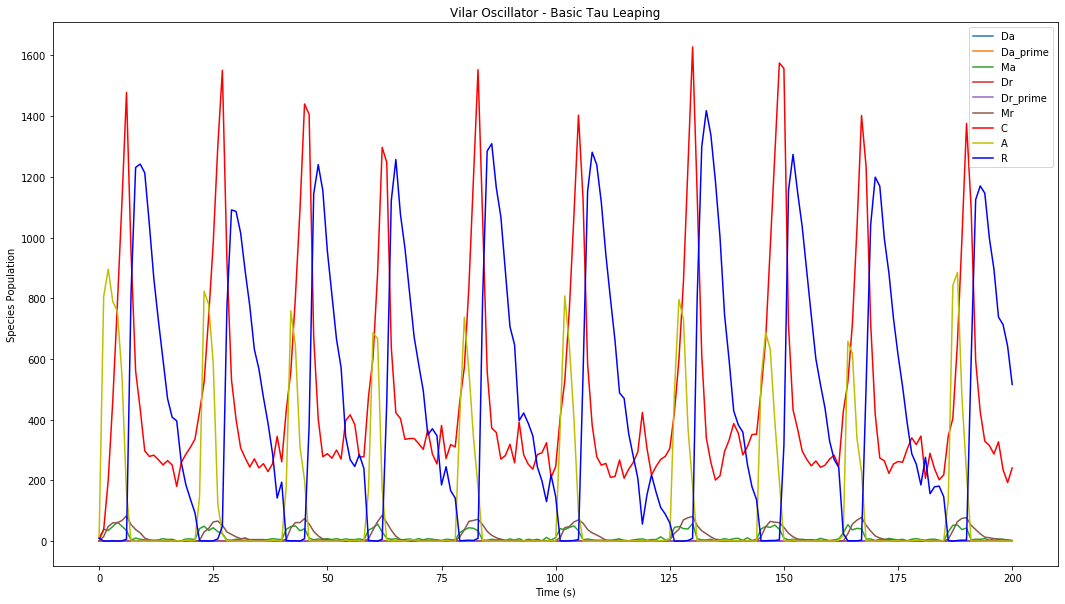

In [21]:
plt.figure(figsize=(18,10))
plt.title("Vilar Oscillator - Basic Tau Leaping")
plt.xlabel("Time (s)")
plt.ylabel("Species Population")

plt.plot(results[0]['time'],results[0]['Da'], label='Da')
plt.plot(results[0]['time'],results[0]['Da_prime'], label='Da_prime')
plt.plot(results[0]['time'],results[0]['Ma'], label='Ma')
plt.plot(results[0]['time'],results[0]['Dr'], label='Dr')
plt.plot(results[0]['time'],results[0]['Dr_prime'], label='Dr_prime')
plt.plot(results[0]['time'],results[0]['Mr'], label='Mr')
plt.plot(results[0]['time'],results[0]['C'],'r', label='C')
plt.plot(results[0]['time'],results[0]['A'],'y', label='A')
plt.plot(results[0]['time'],results[0]['R'],'b', label='R')

plt.plot([0],[11])
plt.legend(loc='best')

### Plotly can be used to create interactive graphs.
 Plotly graphs can only be viewed in a Jupyter Notebook

In [15]:
from plotly.offline import init_notebook_mode, iplot
import pandas as pd
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

output_data_frame = pd.DataFrame({'A':results[0]['A'],'C': results[0]['C'],'Da': results[0]['Da'],
                                  'Da_prime': results[0]['Da_prime'],'Dr':results[0]['Dr'],
                                  'Dr_prime':results[0]['Dr_prime'],'Ma':results[0]['Ma'],
                                  'Mr':results[0]['Mr'],'R':results[0]['R']})
output_data_frame.iplot()

<script type="text/javascript">
        window.PlotlyConfig = {MathJaxConfig: 'local'};
        if (window.MathJax) {MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}
        if (typeof require !== 'undefined') {
        require.undef("plotly");
        requirejs.config({
            paths: {
                'plotly': ['https://cdn.plot.ly/plotly-latest.min']
            }
        });
        require(['plotly'], function(Plotly) {
            window._Plotly = Plotly;
        });
        }
        </script>

<script type="text/javascript">
        window.PlotlyConfig = {MathJaxConfig: 'local'};
        if (window.MathJax) {MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}
        if (typeof require !== 'undefined') {
        require.undef("plotly");
        requirejs.config({
            paths: {
                'plotly': ['https://cdn.plot.ly/plotly-latest.min']
            }
        });
        require(['plotly'], function(Plotly) {
            window._Plotly = Plotly;
        });
        }
        </script>

<div>
        
        
            <div id="6f59f95b-fa16-4185-968b-74c84f179c0a" class="plotly-graph-div" style="height:525px; width:100%;"></div>
            <script type="text/javascript">
                require(["plotly"], function(Plotly) {
                    window.PLOTLYENV=window.PLOTLYENV || {};
                    window.PLOTLYENV.BASE_URL='https://plot.ly';
                    
                if (document.getElementById("6f59f95b-fa16-4185-968b-74c84f179c0a")) {
                    Plotly.newPlot(
                        '6f59f95b-fa16-4185-968b-74c84f179c0a',
                        [{"line": {"color": "rgba(255, 153, 51, 1.0)", "dash": "solid", "shape": "linear", "width": 1.3}, "mode": "lines", "name": "A", "text": "", "type": "scatter", "uid": "0c94017b-73d1-4f71-9b6b-ab2391e19c2f", "x": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "y": [10.0, 673.0, 1037.0, 938.0, 513.0, 384.0, 50.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 10.0, 2.0, 466.0, 671.0, 516.0, 309.0, 42.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 4.0, 252.0, 787.0, 871.0, 421.0, 438.0, 52.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 4.0, 3.0, 0.0, 2.0, 2.0, 1.0, 0.0, 0.0, 2.0, 98.0, 774.0, 805.0, 474.0, 187.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 3.0, 1.0, 93.0, 667.0, 855.0, 622.0, 413.0, 147.0, 0.0, 0.0, 0.0, 0.0]}, {"line": {"color": "rgba(55, 128, 191, 1.0)", "dash": "solid", "shape": "linear", "width": 1.3}, "mode": "lines", "name": "C", "text": "", "type": "scatter", "uid": "762bc5fe-8312-4f8a-a7e6-a44a6a004696", "x": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "y": [10.0, 65.0, 234.0, 574.0, 964.0, 1394.0, 1755.0, 1010.0, 582.0, 339.0, 298.0, 271.0, 255.0, 214.0, 241.0, 309.0, 338.0, 267.0, 229.0, 305.0, 280.0, 274.0, 370.0, 329.0, 468.0, 652.0, 984.0, 1341.0, 1678.0, 825.0, 446.0, 386.0, 304.0, 302.0, 226.0, 250.0, 243.0, 260.0, 246.0, 224.0, 222.0, 232.0, 245.0, 291.0, 371.0, 278.0, 306.0, 361.0, 454.0, 640.0, 895.0, 1275.0, 1655.0, 947.0, 516.0, 292.0, 283.0, 257.0, 275.0, 257.0, 342.0, 272.0, 305.0, 250.0, 255.0, 259.0, 242.0, 220.0, 284.0, 286.0, 386.0, 469.0, 653.0, 1000.0, 1353.0, 1627.0, 786.0, 466.0, 308.0, 289.0, 226.0, 228.0, 257.0, 253.0, 222.0, 318.0, 264.0, 285.0, 257.0, 216.0, 239.0, 384.0, 462.0, 705.0, 979.0, 1368.0, 1756.0, 1378.0, 647.0, 415.0, 321.0]}, {"line": {"color": "rgba(50, 171, 96, 1.0)", "dash": "solid", "shape": "linear", "width": 1.3}, "mode": "lines", "name": "Da", "text": "", "type": "scatter", "uid": "9b41b8b1-3f24-4596-a4b3-42b2a40ccc62", "x": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "y": [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0